In [25]:
# Decidi fazer o exercício em python pois sei que é a língua mais usada na empresa. Eu possuo bem mais expertise em R portanto talvez cometa algumas
# más práticas no caminho, estou no entando trabalhando para melhorar.

import os
import json
import pandas as pd
import numpy as np

file_name = '/receitas.json'
my_path = os.getcwd() + file_name
receitas = pd.read_json(my_path)

# Primeiramente eu exploro os dados e tento entender o que está sendo mostrado e busco por erros. Uma coisa importante que encontro é a existência
# de NaN nas calorias, então analiso o tamanho do problema.

nan_calories = receitas[receitas.calories.isnull()].copy()

In [26]:
# Optei por retirar os NaN já que não achei nenhuma forma efetiva de substituir. No mais testei se algum outro campo tinha NaN, o que só ocorria na
# desc mas não achei relevante o suficiente para eliminar.

receitas = receitas[receitas.calories.notnull()]

# Agora decidi partir para os exercícios em si, nas primeiras questões não é especificado o número de receitas mais calóricas, mas já que em uma
# pergunta mais para frente é pedido o top 100, decidi usar top 100 aqui também.

mais_caloricas = receitas.nlargest(100, 'calories').copy()

# Aqui eu percebi que algumas receitas tinham valores absurdos de calorias. Outro problema também é que muitas receitas de fato eram muito calóricas,
# não por serem comidas realmente calóricas mas por possuirem porções muito grandes. Não achei uma forma ótima de lidas com porcões grandes mas decidi
# tirar todas as receitas com mais de 15 mil calorias.

receitas = receitas[receitas.calories <= 15000]
mais_caloricas = receitas.nlargest(100, 'calories').copy()

#Agora vamos listar as categorias contidas nessas 100 receitas.

categories_list = {}
for i in range(0,len(mais_caloricas)):
    for j in mais_caloricas.iloc[i,mais_caloricas.columns.get_loc("categories")]:
        if j not in categories_list.keys():
            categories_list[j] = 1
        else:
            categories_list[j] += 1


In [27]:
categories_list

{'#CAKEWEEK': 2,
 'Advance Prep Required': 1,
 'Almond': 4,
 'Appetizer': 3,
 'Apple': 10,
 'Apricot': 3,
 'Artichoke': 1,
 'Asparagus': 2,
 'Back to School': 3,
 'Backyard BBQ': 3,
 'Bacon': 4,
 'Bake': 40,
 'Banana': 1,
 'Barley': 1,
 'Basil': 1,
 'Bean': 2,
 'Beef': 3,
 'Beef Tenderloin': 1,
 'Beer': 1,
 'Bell Pepper': 2,
 'Berry': 1,
 'Birthday': 5,
 'Blackberry': 2,
 'Blue Cheese': 1,
 'Blueberry': 1,
 'Bon Appétit': 26,
 'Bourbon': 3,
 'Braise': 4,
 'Brandy': 2,
 'Bread': 3,
 'Breadcrumbs': 1,
 'Breakfast': 3,
 'Brine': 1,
 'Broccoli Rabe': 1,
 'Broil': 3,
 'Brunch': 3,
 'Butter': 2,
 'Buttermilk': 1,
 'Butternut Squash': 1,
 'Butterscotch/Caramel': 1,
 'Cabbage': 1,
 'Cake': 24,
 'California': 1,
 'Capers': 1,
 'Carrot': 5,
 'Celery': 3,
 'Cheese': 3,
 'Cherry': 1,
 'Chicken': 17,
 'Chickpea': 3,
 'Chill': 7,
 'Chocolate': 7,
 'Christmas': 8,
 'Christmas Eve': 2,
 'Cilantro': 2,
 'Cinnamon': 2,
 'Citrus': 5,
 'Clam': 2,
 'Clove': 1,
 'Cocktail Party': 4,
 'Coconut': 6,
 'Coffee'

In [6]:
# Agora vamos investigar os ingredientes. A primeira coisa que eu faço é retirar números e algumas palavras que indiquem porções. Dessa forma
# 2 teaspoons of salt ou 1/2 tablespoon of salt são o mesmo ingrediente. Eu achei tais palavras olhando para a tabela, o método funciona bem mas 
# não é muito eficiente para tabelas maiores, se eu tivesse uma quantidade muito grande de dados teria que achar um método menos correto mas mais
# eficiente, foi um trade off.

bad_words = ["(about   pounds)", "(about   pound)", "( g)", "(  ounces)", "cups", "cup", "tablespoons", "teaspoons", "tablespoon", 
             "teaspoon", "/", ",", "(. oz   g)", "( oz   g)", "About", "about", "(  sticks)", "(  stick)", "( sticks)", "( stick)",
            "(optional)", "( -inch-thick)", "(- to -inch-thick)", "( lb)", "( pounds total)", "()", "(- to -ounce) ", "(-inch)",
            "(-inch-thick)", "(-inch-long)", "(-ounce)", "(-ounces)", "(-oz)", "(.-ounce)", "( inch)", "-inch-thick", "- to -pound ",
            "-", "(or  bag) ", "(or more)", "(packed)", "(scant)", "smashed", "peeled", "minced", "crushed", "Pinch of", "A few dashes of", 
            "pounds", "pound", "ounces", "ounce", "(  )", "( )", "()", "( to  inch)", "to  ", "plus   "]
for a in mais_caloricas.ingredients: 
    for i in range(0,len(a)):
        for j in range(0,10):
            a[i] = a[i].replace(str(j),'')
        for k in bad_words:
            a[i] = a[i].replace(k,'')
            a[i] = a[i].strip()
            a[i] = a[i].upper()
            a[i] = a[i].replace(' ','')
            
ingredients_list = {}
for i in range(0,len(mais_caloricas)):
    for j in mais_caloricas.iloc[i,mais_caloricas.columns.get_loc("ingredients")]:
        if j not in ingredients_list.keys():
            ingredients_list[j] = 1
        else:
            ingredients_list[j] += 1
            
# Agora pegamos os 10 ingredientes mais comuns

top10_ingredients = sorted(ingredients_list, key=ingredients_list.get, reverse=True)[:10]

In [7]:
top10_ingredients

['TEASPOONSALT',
 'LARGEEGGS',
 'CUPSUGAR',
 'CUPSALLPURPOSEFLOUR',
 'TEASPOONVANILLAEXTRACT',
 'TEASPOONBAKINGSODA',
 'CUPHEAVYCREAM',
 'CUPDRYWHITEWINE',
 'CUPSSUGAR',
 'CUPVEGETABLEOIL']

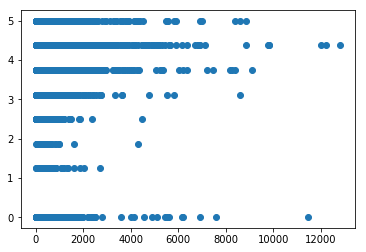

In [10]:
# Para recomendar receitas eu usei a seguinte lógica: quero maximizar rating e minimizar calorias. Eu poderia também tentar minimizar número 
# de ingredientes mas isso assumiria que a pessoa quer praticidade, o que nem sempre é o caso, e provavelmente a praticidade já está embutida 
# no rating da receita. Eu peguei também proteina.

recomendados = receitas.loc[:,["calories", "rating", "title", "protein"]].copy()

# agora usamos um scatter plot pra visualizar os dados.

import matplotlib.pyplot as plt

plt.scatter("calories", "rating", data = recomendados)
plt.show()

In [9]:
# o gráfico não está bonito mas está bastante informativo e prático, o que é o objetivo aqui. Ele nos diz que das receitas de rating 5 existe um
# grande range de calorias. Portanto meu método será esolher 3 receitas pouco calóricas com rating 5. Eu não considero receitas com menos de 100
# calorias pois elas parecem ser coisas muito simples.

recomendados = recomendados[recomendados.rating == 5.0][recomendados.calories <= 1000][recomendados.calories >= 100]
# Eu aproveito a coluna de protein e multiplico por 4 e subtraio das calories, agora eu sei a quantidade de calorias não proteicas, o que uma pessoa
# saudável buscaria minimizar

recomendados = recomendados.assign(bad_calories = recomendados.calories - 4*recomendados.protein).sort_values(by = 'bad_calories')

#Portanto eu recomendaria 'Giblet Stock', 'Scallop, Shrimp, and Squid "Ceviche"' e Turkey Stock

/Users/vitorfreitas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [12]:
recomendados

,calories,rating,title,protein
0,426.0,2.500,"Lentil, Apple, and Turkey Wrap",30.0
1,403.0,4.375,Boudin Blanc Terrine with Red Onion Confit,18.0
2,165.0,3.750,Potato and Fennel Soup Hodge,6.0
4,547.0,3.125,Spinach Noodle Casserole,20.0
5,948.0,4.375,The Best Blts,19.0
...,...,...,...,...
20125,28.0,3.125,Parmesan Puffs,2.0
20126,671.0,4.375,Artichoke and Parmesan Risotto,22.0
20127,563.0,4.375,Turkey Cream Puff Pie,31.0
20128,631.0,4.375,Snapper on Angel Hair with Citrus Cream,45.0


In [13]:
# Agora vamos investigar a correlação de rating com as outras caracteristicas da receita. Eu vou olhar os valores númericos calories, fat, protein, 
# sodium. Irei também olhar o número de ingredientes, o número de categorias e o número de directions da receita.

receitas_cor = receitas.copy()
receitas_cor['num_ingredients'] = receitas_cor.ingredients.apply(lambda x: len(x))
receitas_cor['num_categories'] = receitas_cor.categories.apply(lambda x: len(x))
receitas_cor['num_directions'] = receitas_cor.directions.apply(lambda x: len(x))
receitas_cor = receitas_cor.loc[:,['rating', 'calories', 'fat', 'protein', 'num_ingredients' ,'num_categories', 'num_directions']]

corr = receitas_cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,calories,fat,protein,num_ingredients,num_categories,num_directions
rating,1,0.079395,0.0810625,0.0820089,0.179692,0.120331,0.105012
calories,0.079395,1,0.914259,0.709357,0.271211,-0.0319221,0.242644
fat,0.0810625,0.914259,1,0.571126,0.228934,-0.0445012,0.215476
protein,0.0820089,0.709357,0.571126,1,0.208678,-0.0731857,0.155579
num_ingredients,0.179692,0.271211,0.228934,0.208678,1,0.096818,0.555773
num_categories,0.120331,-0.0319221,-0.0445012,-0.0731857,0.096818,1,0.0993886
num_directions,0.105012,0.242644,0.215476,0.155579,0.555773,0.0993886,1


In [14]:
# O mapa de calor não mostra forte correlação entre rating e os outros parâmetros. Achei interessante a quase ausência de correlação entre rating e
# calorias já que tanto receitas com muitas calorias, e portanto muito gostosas, quanto receitas com pouco calorias, e portanto saudáveis, podem 
# influenciar um alto rating. O que me resta então é olhar para as categorias e ver quais categorias possuem rating médio mais alto.

categories_table = receitas.copy().loc[:, ['categories', 'rating']]
categories_table = categories_table.explode('categories').groupby('categories').mean().sort_values(by = 'rating', ascending = False)

# explode só funcoina nas versões mais recentes do pandas

In [15]:
display(categories_table)

,rating
categories,
Louisville,5.0
Suzanne Goin,5.0
Rub,5.0
Burrito,5.0
#WasteLess,5.0
...,...
Fritter,0.0
Nancy Silverton,0.0
Philippines,0.0


In [16]:
# Agora vamos voltar para as categorias das 100 receitas mais calóricas e contruir um crawler simples para saber quantas receitas existem para cada.

top100_categories = list(categories_list.keys())

In [17]:
from lxml import html
import requests

amounts_dict = {}

for i in range(0,len(top100_categories)):
    top100_categories[i] = top100_categories[i].replace('/', ' ')

for i in top100_categories:
    link = "https://www.epicurious.com/search/" + i + "?content=recipe"
    page = requests.get(link)
    tree = html.fromstring(page.content)
    amount = tree.xpath('//span[@class="matching-count"]/text()')
    amounts_dict[i] = int(str(amount[0]).replace(',',''))

In [ ]:
amounts_dict

In [ ]:
# Quanto ao problema opcional de modelagem eu testei métodos usando ingredientes como parâmetros para classificar as categorias. Transformei tudo em
# dummy variables. O método foi bem custoso e a precisão não foi ideal. Eu queria continuar otimizando mas infelizmente por erro meu não aloquei tempo
# suficiente e comecei essa parte bem perto da deadline pois imaginei que seria mais simples. Acredito que mesmo melhorando o modelo ele não rodará a 
# tempo do prazo mas vou continuar tentando mesmo assim e talvez depois possamos discutir meus achados.